# ANÁLISIS EDA: "Más allá de los números: Explorando la volatilidad y las conexiones entre Bitcoin, Nasdaq, acciones y Oro"

## Tema a tratar:
En este análisis exploratorio de datos, nos adentraremos en el fascinante mundo de los activos financieros para comprender la volatilidad y las interconexiones entre Bitcoin, el índice Nasdaq, acciones y el Oro. A través de una minuciosa exploración de los datos históricos, nos centraremos en tres hipótesis fundamentales.

En primer lugar, investigaremos si Bitcoin se destaca como el activo más volátil en comparación con los demás. Analizaremos las fluctuaciones de precios y las variaciones porcentuales para determinar si Bitcoin presenta una volatilidad significativamente superior a la de otros activos financieros.

En segundo lugar, examinaremos la existencia de correlaciones significativas entre los activos financieros mencionados. A través del cálculo de las correlaciones entre los precios de cierre, evaluaremos si existe una relación estrecha entre Bitcoin, Nasdaq, acciones y el Oro. Estas correlaciones nos ayudarán a comprender las posibles influencias y dependencias entre los diferentes activos financieros.

Por último, nos sumergiremos en el impacto de los días de la semana en la volatilidad de los activos financieros. Realizaremos un análisis comparativo entre los índices, las acciones y las criptomonedas, examinando las variaciones porcentuales significativas en días específicos de la semana. Identificaremos los días en los que se observa una mayor volatilidad en cada activo financiero, lo que podría proporcionar información valiosa para la toma de decisiones de inversión.

A través de este análisis exploratorio de datos, pretendemos profundizar en la comprensión de la volatilidad de los activos financieros y las interconexiones entre ellos. Al demostrar las hipótesis planteadas, obtendremos una visión más completa de los movimientos del mercado y las posibles oportunidades de inversión en Bitcoin, Nasdaq, acciones y Oro.

## Hipótesis a demostrar:
1. La volatilidad de Bitcoin es significativamente superior  a la del resto.
2. Existe una correlación significativa entre los activos financieros analizados.
3. El impacto de los días de la semana en la volatilidad de los activos financieros: Un análisis comparativo entre índices, acciones y criptomonedas.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import nbformat


In [394]:
# Los dataFrames que vamos a utilizar son:
tesla = pd.read_csv("data/tesla1.csv")
fuente_1 = "https://es.investing.com/equities/tesla-motors-historical-data"

apple = pd.read_csv("apple.csv")
fuente_apple = "https://es.investing.com/equities/apple-computer-inc-historical-data"

microsoft = pd.read_csv("microsoft.csv")
fuente_microsoft = "https://es.investing.com/equities/microsoft-corp-historical-data"

nasdaq = pd.read_csv("nasdaq.csv")
fuente_4 = "https://es.investing.com/indices/nq-100-historical-data"

oro = pd.read_csv("oro.csv")
fuente_2 = "https://es.investing.com/currencies/xau-usd-historical-data"

bitcoin = pd.read_csv("bitcoin.csv")
fuente_3 = "https://es.investing.com/crypto/bitcoin/historical-data"

In [395]:
# Comprobaciones previas del DataFrame
tesla.head()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2023,"180,14","177,17","181,95","176,31","136,20M","1,84%"
1,18.05.2023,"176,89","174,22","177,06","172,45","107,80M","1,74%"
2,17.05.2023,"173,86","168,41","174,50","167,18","125,47M","4,41%"
3,16.05.2023,"166,52","165,65","169,52","164,35","98,29M","0,10%"
4,15.05.2023,"166,35","167,65","169,76","164,55","104,92M","-0,97%"


In [396]:
# Comprobaciones previas del DataFrame
tesla.tail()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
3228,23.07.2010,"1,42","1,41","1,44","1,40","9,81M","1,43%"
3229,22.07.2010,"1,40","1,37","1,42","1,36","14,44M","3,70%"
3230,21.07.2010,"1,35","1,38","1,39","1,30","18,80M","0,00%"
3231,20.07.2010,"1,35","1,46","1,46","1,34","27,38M","-7,53%"
3232,19.07.2010,"1,46","1,42","1,48","1,39","37,30M","5,80%"


In [397]:
# Comprobamos los tipos de datos que tenemos y son todos de tipo string
tesla.dtypes

Fecha       object
Último      object
Apertura    object
Máximo      object
Mínimo      object
Vol.        object
% var.      object
dtype: object

In [398]:
# Observamos que el DataFrame de tesla contiene 3232 filas y 7 columnas con todos los datos de tipo string
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     3233 non-null   object
 1   Último    3233 non-null   object
 2   Apertura  3233 non-null   object
 3   Máximo    3233 non-null   object
 4   Mínimo    3233 non-null   object
 5   Vol.      3233 non-null   object
 6   % var.    3233 non-null   object
dtypes: object(7)
memory usage: 176.9+ KB


In [399]:
# No se pueden sacar casi conclusiones debido a que los datos están en formato string y con ellos no se pueden realizar operaciones matemáticas
tesla.describe()

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
count,3233,3233,3233,3233,3233,3233,3233
unique,3233,1990,1974,1980,1994,2952,1196
top,19.05.2023,"1,84","1,90","1,87","1,82","13,84M","0,00%"
freq,1,18,19,18,23,4,71


## Limpieza del DataFrame con funciones

In [400]:
# Creamos la función insertar_columna_acronimo() para insertar columnas distintas en cada DataFrame
def insertar_columna_acronimo(df, nombre_columna, acronimo, posicion):
    df.insert(posicion, nombre_columna, acronimo)
    return df


# Insertamos una columna en cada DataFrame con un nombre y su acrónimo
tesla = insertar_columna_acronimo(tesla, "Tesla", "TSLA", 1)
apple = insertar_columna_acronimo(apple, "Apple", "AAPL", 1)
microsoft = insertar_columna_acronimo(microsoft, "Microsoft", "MSFT", 1)
nasdaq = insertar_columna_acronimo(nasdaq, "Nasdaq", "NASDAQ", 1)
oro = insertar_columna_acronimo(oro, "Oro", "XAU/USD", 1)
bitcoin = insertar_columna_acronimo(bitcoin, "Bitcoin", "BTC/USD", 1)

In [401]:
# comprobamos el cambio con la incorporacion de una nueva columna llamada "Tesla"
tesla.head()

,Fecha,Tesla,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2023,TSLA,"180,14","177,17","181,95","176,31","136,20M","1,84%"
1,18.05.2023,TSLA,"176,89","174,22","177,06","172,45","107,80M","1,74%"
2,17.05.2023,TSLA,"173,86","168,41","174,50","167,18","125,47M","4,41%"
3,16.05.2023,TSLA,"166,52","165,65","169,52","164,35","98,29M","0,10%"
4,15.05.2023,TSLA,"166,35","167,65","169,76","164,55","104,92M","-0,97%"


In [402]:
# Creamos la función de rename_columns() para renombrar todas las columnas de nuestros DataFrames, ya que todas se llaman igual
def rename_columns(df):
    df = df.rename(columns={"Último": "Cierre", "Vol.": "Volumen.M", "% var.": "Var.%"})
    return df


# Aplicamos la función a cada DataFrame
tesla = rename_columns(tesla)
apple = rename_columns(apple)
microsoft = rename_columns(microsoft)
nasdaq = rename_columns(nasdaq)
oro = rename_columns(oro)
bitcoin = rename_columns(bitcoin)


In [403]:
# Comprobamos el cambio de los nombres de las columnas
tesla.head()

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Volumen.M,Var.%
0,19.05.2023,TSLA,"180,14","177,17","181,95","176,31","136,20M","1,84%"
1,18.05.2023,TSLA,"176,89","174,22","177,06","172,45","107,80M","1,74%"
2,17.05.2023,TSLA,"173,86","168,41","174,50","167,18","125,47M","4,41%"
3,16.05.2023,TSLA,"166,52","165,65","169,52","164,35","98,29M","0,10%"
4,15.05.2023,TSLA,"166,35","167,65","169,76","164,55","104,92M","-0,97%"


In [404]:
# Eliminamos la columna de Volumen, ya que no la vamos a usar
# Recuerda que es una columna que hemos usado en la función de renombrar para así en un futuro si queremos podemos no eliminar esta columna fácilmente

def eliminar_columna_volumen(df):
    if "Volumen.M" in df.columns:
        del df["Volumen.M"]
    return df

# Aplicamos la función a cada DataFrame
tesla = eliminar_columna_volumen(tesla)
apple = eliminar_columna_volumen(apple)
microsoft = eliminar_columna_volumen(microsoft)
nasdaq = eliminar_columna_volumen(nasdaq)
oro = eliminar_columna_volumen(oro)
bitcoin = eliminar_columna_volumen(bitcoin)


In [405]:
# Comprobamos los cambios realizados
tesla.columns

Index(['Fecha', 'Tesla', 'Cierre', 'Apertura', 'Máximo', 'Mínimo', 'Var.%'], dtype='object')

In [406]:
# Usamos la función de eliminar_simbolo_porcentaje() para quitar de la columna "Var.%" todos los "%" y así luego poder pasar a float
def eliminar_simbolo_porcentaje(df, columna):
    df[columna] = df[columna].replace("%", "", regex=True)
    return df

# Eliminamos el símbolo "%" en cada DataFrame
tesla = eliminar_simbolo_porcentaje(tesla, "Var.%")
apple = eliminar_simbolo_porcentaje(apple, "Var.%")
microsoft = eliminar_simbolo_porcentaje(microsoft, "Var.%")
nasdaq = eliminar_simbolo_porcentaje(nasdaq, "Var.%")
oro = eliminar_simbolo_porcentaje(oro, "Var.%")
bitcoin = eliminar_simbolo_porcentaje(bitcoin, "Var.%")


In [407]:
# Comprobamos los cambios realizados
tesla.head()

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Var.%
0,19.05.2023,TSLA,"180,14","177,17","181,95","176,31","1,84"
1,18.05.2023,TSLA,"176,89","174,22","177,06","172,45","1,74"
2,17.05.2023,TSLA,"173,86","168,41","174,50","167,18","4,41"
3,16.05.2023,TSLA,"166,52","165,65","169,52","164,35","0,10"
4,15.05.2023,TSLA,"166,35","167,65","169,76","164,55","-0,97"


In [408]:
# Usamos la función limpiar_convertir_columnas_numericas() para 3 cosas:
    # Limpiamos las columnas cambiando los "." por "" para aquellos valos que tienen miles y decimales
    # Limpiamos las columnas y cambiamos las "," por "." para poder marcar los decimales correctamente y así poder pasar a tipo float
    # Pasamos esas columnas que deseamos a tipo float
def limpiar_convertir_columnas_numericas(df, columnas_numericas):
    df[columnas_numericas] = df[columnas_numericas].apply(lambda x: x.str.replace('.', ''))
    df[columnas_numericas] = df[columnas_numericas].apply(lambda x: x.str.replace(',', '.'))
    df[columnas_numericas] = df[columnas_numericas].astype(float)
    return df

columnas_numericas = ["Cierre", "Apertura", "Máximo", "Mínimo", "Var.%"]

# Limpiamos y convertimos las columnas numéricas que queremos de la lista en cada DataFrame
tesla = limpiar_convertir_columnas_numericas(tesla, columnas_numericas)
apple = limpiar_convertir_columnas_numericas(apple, columnas_numericas)
microsoft = limpiar_convertir_columnas_numericas(microsoft, columnas_numericas)
nasdaq = limpiar_convertir_columnas_numericas(nasdaq, columnas_numericas)
oro = limpiar_convertir_columnas_numericas(oro, columnas_numericas)
bitcoin = limpiar_convertir_columnas_numericas(bitcoin, columnas_numericas)


In [409]:
# comprobamos el cambio
tesla.head()

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Var.%
0,19.05.2023,TSLA,180.14,177.17,181.95,176.31,1.84
1,18.05.2023,TSLA,176.89,174.22,177.06,172.45,1.74
2,17.05.2023,TSLA,173.86,168.41,174.50,167.18,4.41
3,16.05.2023,TSLA,166.52,165.65,169.52,164.35,0.10
4,15.05.2023,TSLA,166.35,167.65,169.76,164.55,-0.97


In [410]:
# comprobamos el cambio
tesla.dtypes

Fecha        object
Tesla        object
Cierre      float64
Apertura    float64
Máximo      float64
Mínimo      float64
Var.%       float64
dtype: object

In [411]:
# Cambiamos la columna 'Fecha' de tipo string a tipo datetime usando la funcion cambiar_tipo_fecha()
# Usamos el formato de d-m-y (día-mes-año)
def cambiar_tipo_fecha(df):
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y')
    return df

# Aplicamos la función a cada DataFrame
tesla = cambiar_tipo_fecha(tesla)
apple = cambiar_tipo_fecha(apple)
microsoft = cambiar_tipo_fecha(microsoft)
nasdaq = cambiar_tipo_fecha(nasdaq)
oro = cambiar_tipo_fecha(oro)
bitcoin = cambiar_tipo_fecha(bitcoin)



In [412]:
# Comprobamos el cambio realizado
tesla.dtypes

Fecha       datetime64[ns]
Tesla               object
Cierre             float64
Apertura           float64
Máximo             float64
Mínimo             float64
Var.%              float64
dtype: object

In [413]:
# Invertimos el orden de las filas para que el primer valor sea el de la fecha más antigua y el último valor de la fecha más reciente
# Usando iloc[]
def invertir_orden_filas(df):
    df = df.iloc[::-1].reset_index(drop=True)
    return df

# Aplicar la función a cada DataFrame
tesla = invertir_orden_filas(tesla)
apple = invertir_orden_filas(apple)
microsoft = invertir_orden_filas(microsoft)
nasdaq = invertir_orden_filas(nasdaq)
oro = invertir_orden_filas(oro)
bitcoin = invertir_orden_filas(bitcoin)

In [414]:
# Comprobamos el cambio realizado
tesla.head()

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Var.%
0,2010-07-19,TSLA,1.46,1.42,1.48,1.39,5.80
1,2010-07-20,TSLA,1.35,1.46,1.46,1.34,-7.53
2,2010-07-21,TSLA,1.35,1.38,1.39,1.30,0.00
3,2010-07-22,TSLA,1.40,1.37,1.42,1.36,3.70
4,2010-07-23,TSLA,1.42,1.41,1.44,1.40,1.43


In [415]:
# Comprobamos el cambio realizado
tesla.tail()

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Var.%
3228,2023-05-15,TSLA,166.35,167.65,169.76,164.55,-0.97
3229,2023-05-16,TSLA,166.52,165.65,169.52,164.35,0.10
3230,2023-05-17,TSLA,173.86,168.41,174.50,167.18,4.41
3231,2023-05-18,TSLA,176.89,174.22,177.06,172.45,1.74
3232,2023-05-19,TSLA,180.14,177.17,181.95,176.31,1.84


## Unión de los DataFrames

In [416]:
# Comprobamos que las filas no terminan de cuadrar
print("Tesla tiene", tesla.shape[0], "filas y", tesla.shape[1], "columnas")
print("--" *30)
print("Apple tiene", apple.shape[0], "filas y", apple.shape[1], "columnas")
print("--" *30)
print("Microsoft tiene", microsoft.shape[0], "filas y", microsoft.shape[1], "columnas")
print("--" *30)
print("Oro tiene", oro.shape[0], "filas y", oro.shape[1], "columnas")
print("--" *30)
print("Bitcoin tiene", bitcoin.shape[0], "filas y", bitcoin.shape[1], "columnas")
print("--" *30)
print("Nasdaq tiene", nasdaq.shape[0], "filas y", nasdaq.shape[1], "columnas")

Tesla tiene 3233 filas y 7 columnas
------------------------------------------------------------
Apple tiene 3234 filas y 7 columnas
------------------------------------------------------------
Microsoft tiene 3234 filas y 7 columnas
------------------------------------------------------------
Oro tiene 3344 filas y 7 columnas
------------------------------------------------------------
Bitcoin tiene 4690 filas y 7 columnas
------------------------------------------------------------
Nasdaq tiene 3233 filas y 7 columnas


In [417]:
# Usamos la función unir_dataframes() con un bucle for i in range(1, len(dataframes)).
    # DataFrames es una lista que tiene los dataframes que quiero unir
    # La función len(dataframes) es para que nos diga la cantidad de dataframes que hay que unir
    # El uso de range(1, len(dataframes)) es para que genere una secuencia de números desde 1 hsta su longitud.
    # Dentro del bucle usamor el método merge() para unir los DataFrames 
    # Es necesario destacar que usamos el DataFrame de tesla en primer lugar para que tome de referencia a través de how="inner" las fechas de referencia para los demás DataFrames, ya que tesla es la que menos filas tiene junto con Nasdaq
    # Añadimos los sufijos a través de una lista debido a que las columnas son comunes
def unir_dataframes(dataframes, sufijos):
    df_merged = dataframes[0]
    for i in range(1, len(dataframes)):
        df_merged = df_merged.merge(dataframes[i], on='Fecha', how='inner', suffixes=('', '_' + sufijos[i]))

    return df_merged


dataframes = [tesla, apple, microsoft, nasdaq, oro, bitcoin]
sufijos = ["Tesla", "Apple", "Microsoft", "Nasdaq", "Oro", "Bitcoin"]

# Unimos los DataFrames con sufijos usando la unión interna
all_data = unir_dataframes(dataframes, sufijos)

In [418]:
# Usamos set_option() para poder visualizar el total de las columnas y así poder comprobar que está todo correcto
pd.set_option('display.max_columns', None)

In [419]:
# Mostramos el nuevo DataFrame
all_data

,Fecha,Tesla,Cierre,Apertura,Máximo,Mínimo,Var.%,Apple,Cierre_Apple,Apertura_Apple,Máximo_Apple,Mínimo_Apple,Var.%_Apple,Microsoft,Cierre_Microsoft,Apertura_Microsoft,Máximo_Microsoft,Mínimo_Microsoft,Var.%_Microsoft,Nasdaq,Cierre_Nasdaq,Apertura_Nasdaq,Máximo_Nasdaq,Mínimo_Nasdaq,Var.%_Nasdaq,Oro,Cierre_Oro,Apertura_Oro,Máximo_Oro,Mínimo_Oro,Var.%_Oro,Bitcoin,Cierre_Bitcoin,Apertura_Bitcoin,Máximo_Bitcoin,Mínimo_Bitcoin,Var.%_Bitcoin
0,2010-07-19,TSLA,1.46,1.42,1.48,1.39,5.80,AAPL,8.77,8.92,8.92,8.56,-1.68,MSFT,25.23,24.96,25.30,24.91,1.37,NASDAQ,1819.28,1807.99,1822.71,1794.56,0.88,XAU/USD,1183.70,1193.20,1195.10,1177.65,-0.83,BTC/USD,0.1,0.1,0.1,0.1,0.00
1,2010-07-20,TSLA,1.35,1.46,1.46,1.34,-7.53,AAPL,9.00,8.67,9.03,8.57,2.62,MSFT,25.48,24.86,25.48,24.70,0.99,NASDAQ,1840.67,1789.93,1841.16,1784.55,1.18,XAU/USD,1192.30,1184.65,1194.30,1175.85,0.73,BTC/USD,0.1,0.1,0.1,0.1,0.00
2,2010-07-21,TSLA,1.35,1.38,1.39,1.30,0.00,AAPL,9.08,9.47,9.47,9.07,0.89,MSFT,25.12,25.60,25.65,24.98,-1.41,NASDAQ,1817.30,1859.60,1859.85,1813.28,-1.27,XAU/USD,1186.00,1191.40,1198.05,1183.35,-0.53,BTC/USD,0.1,0.1,0.1,0.1,0.00
3,2010-07-22,TSLA,1.40,1.37,1.42,1.36,3.70,AAPL,9.25,9.20,9.29,9.12,1.87,MSFT,25.84,25.51,25.99,25.47,2.87,NASDAQ,1863.10,1842.38,1870.41,1842.38,2.52,XAU/USD,1194.95,1184.90,1200.60,1181.05,0.75,BTC/USD,0.1,0.1,0.1,0.1,0.00
4,2010-07-23,TSLA,1.42,1.41,1.44,1.40,1.43,AAPL,9.28,9.18,9.30,9.15,0.32,MSFT,25.81,25.84,26.02,25.25,-0.12,NASDAQ,1875.38,1851.81,1875.38,1846.32,0.66,XAU/USD,1189.10,1195.05,1203.95,1183.81,-0.49,BTC/USD,0.1,0.1,0.1,0.1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2023-05-15,TSLA,166.35,167.65,169.76,164.55,-0.97,AAPL,172.07,173.16,173.21,171.47,-0.29,MSFT,309.46,309.10,309.90,307.59,0.16,NASDAQ,13413.51,13352.26,13419.71,13298.14,0.55,XAU/USD,2018.41,2011.72,2022.20,2007.28,0.36,BTC/USD,27183.9,26920.4,27651.7,26752.1,0.98
3229,2023-05-16,TSLA,166.52,165.65,169.52,164.35,0.10,AAPL,172.07,171.99,173.14,171.80,0.00,MSFT,311.74,309.83,313.71,309.83,0.74,NASDAQ,13426.01,13385.18,13498.44,13385.18,0.09,XAU/USD,1988.60,2015.90,2018.94,1985.47,-1.48,BTC/USD,27035.3,27183.9,27295.3,26881.9,-0.55
3230,2023-05-17,TSLA,173.86,168.41,174.50,167.18,4.41,AAPL,172.69,171.71,172.93,170.42,0.36,MSFT,314.00,312.29,314.43,310.74,0.72,NASDAQ,13589.26,13474.52,13608.33,13419.35,1.22,XAU/USD,1981.72,1988.94,1993.13,1974.80,-0.35,BTC/USD,27403.1,27035.5,27465.3,26597.7,1.36
3231,2023-05-18,TSLA,176.89,174.22,177.06,172.45,1.74,AAPL,175.05,173.00,175.24,172.58,1.37,MSFT,318.52,314.53,319.04,313.72,1.44,NASDAQ,13834.62,13610.25,13844.40,13606.92,1.81,XAU/USD,1958.05,1981.52,1986.12,1951.97,-1.19,BTC/USD,26828.0,27403.8,27467.0,26449.8,-2.10


In [420]:
# Creamos una nueva columna basándonos en la columna de "Fecha" 
# La nueva columna en la posición 2 de las columnas, se llamará "DiasSemana" y para ello usamos el método strftime("%A")
all_data['Fecha'] = pd.to_datetime(all_data['Fecha'], format="%d.%m.%Y")
all_data.insert(2, 'DiasSemana', all_data['Fecha'].dt.strftime("%A"))

In [421]:
# Comprobamos el cambio realizado
all_data.head()

,Fecha,Tesla,DiasSemana,Cierre,Apertura,Máximo,Mínimo,Var.%,Apple,Cierre_Apple,Apertura_Apple,Máximo_Apple,Mínimo_Apple,Var.%_Apple,Microsoft,Cierre_Microsoft,Apertura_Microsoft,Máximo_Microsoft,Mínimo_Microsoft,Var.%_Microsoft,Nasdaq,Cierre_Nasdaq,Apertura_Nasdaq,Máximo_Nasdaq,Mínimo_Nasdaq,Var.%_Nasdaq,Oro,Cierre_Oro,Apertura_Oro,Máximo_Oro,Mínimo_Oro,Var.%_Oro,Bitcoin,Cierre_Bitcoin,Apertura_Bitcoin,Máximo_Bitcoin,Mínimo_Bitcoin,Var.%_Bitcoin
0,2010-07-19,TSLA,Monday,1.46,1.42,1.48,1.39,5.80,AAPL,8.77,8.92,8.92,8.56,-1.68,MSFT,25.23,24.96,25.30,24.91,1.37,NASDAQ,1819.28,1807.99,1822.71,1794.56,0.88,XAU/USD,1183.70,1193.20,1195.10,1177.65,-0.83,BTC/USD,0.1,0.1,0.1,0.1,0.0
1,2010-07-20,TSLA,Tuesday,1.35,1.46,1.46,1.34,-7.53,AAPL,9.00,8.67,9.03,8.57,2.62,MSFT,25.48,24.86,25.48,24.70,0.99,NASDAQ,1840.67,1789.93,1841.16,1784.55,1.18,XAU/USD,1192.30,1184.65,1194.30,1175.85,0.73,BTC/USD,0.1,0.1,0.1,0.1,0.0
2,2010-07-21,TSLA,Wednesday,1.35,1.38,1.39,1.30,0.00,AAPL,9.08,9.47,9.47,9.07,0.89,MSFT,25.12,25.60,25.65,24.98,-1.41,NASDAQ,1817.30,1859.60,1859.85,1813.28,-1.27,XAU/USD,1186.00,1191.40,1198.05,1183.35,-0.53,BTC/USD,0.1,0.1,0.1,0.1,0.0
3,2010-07-22,TSLA,Thursday,1.40,1.37,1.42,1.36,3.70,AAPL,9.25,9.20,9.29,9.12,1.87,MSFT,25.84,25.51,25.99,25.47,2.87,NASDAQ,1863.10,1842.38,1870.41,1842.38,2.52,XAU/USD,1194.95,1184.90,1200.60,1181.05,0.75,BTC/USD,0.1,0.1,0.1,0.1,0.0
4,2010-07-23,TSLA,Friday,1.42,1.41,1.44,1.40,1.43,AAPL,9.28,9.18,9.30,9.15,0.32,MSFT,25.81,25.84,26.02,25.25,-0.12,NASDAQ,1875.38,1851.81,1875.38,1846.32,0.66,XAU/USD,1189.10,1195.05,1203.95,1183.81,-0.49,BTC/USD,0.1,0.1,0.1,0.1,0.0


In [422]:
# Quitamos el índice y lo cambiamos por la columna de "Fecha" y lo guardamos sobre el DataFame original usando inplace=True
all_data.set_index("Fecha", inplace= True)
all_data.head()

,Tesla,DiasSemana,Cierre,Apertura,Máximo,Mínimo,Var.%,Apple,Cierre_Apple,Apertura_Apple,Máximo_Apple,Mínimo_Apple,Var.%_Apple,Microsoft,Cierre_Microsoft,Apertura_Microsoft,Máximo_Microsoft,Mínimo_Microsoft,Var.%_Microsoft,Nasdaq,Cierre_Nasdaq,Apertura_Nasdaq,Máximo_Nasdaq,Mínimo_Nasdaq,Var.%_Nasdaq,Oro,Cierre_Oro,Apertura_Oro,Máximo_Oro,Mínimo_Oro,Var.%_Oro,Bitcoin,Cierre_Bitcoin,Apertura_Bitcoin,Máximo_Bitcoin,Mínimo_Bitcoin,Var.%_Bitcoin
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,TSLA,Monday,1.46,1.42,1.48,1.39,5.80,AAPL,8.77,8.92,8.92,8.56,-1.68,MSFT,25.23,24.96,25.30,24.91,1.37,NASDAQ,1819.28,1807.99,1822.71,1794.56,0.88,XAU/USD,1183.70,1193.20,1195.10,1177.65,-0.83,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-20,TSLA,Tuesday,1.35,1.46,1.46,1.34,-7.53,AAPL,9.00,8.67,9.03,8.57,2.62,MSFT,25.48,24.86,25.48,24.70,0.99,NASDAQ,1840.67,1789.93,1841.16,1784.55,1.18,XAU/USD,1192.30,1184.65,1194.30,1175.85,0.73,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-21,TSLA,Wednesday,1.35,1.38,1.39,1.30,0.00,AAPL,9.08,9.47,9.47,9.07,0.89,MSFT,25.12,25.60,25.65,24.98,-1.41,NASDAQ,1817.30,1859.60,1859.85,1813.28,-1.27,XAU/USD,1186.00,1191.40,1198.05,1183.35,-0.53,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-22,TSLA,Thursday,1.40,1.37,1.42,1.36,3.70,AAPL,9.25,9.20,9.29,9.12,1.87,MSFT,25.84,25.51,25.99,25.47,2.87,NASDAQ,1863.10,1842.38,1870.41,1842.38,2.52,XAU/USD,1194.95,1184.90,1200.60,1181.05,0.75,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-23,TSLA,Friday,1.42,1.41,1.44,1.40,1.43,AAPL,9.28,9.18,9.30,9.15,0.32,MSFT,25.81,25.84,26.02,25.25,-0.12,NASDAQ,1875.38,1851.81,1875.38,1846.32,0.66,XAU/USD,1189.10,1195.05,1203.95,1183.81,-0.49,BTC/USD,0.1,0.1,0.1,0.1,0.0


In [424]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos loc[] para obtener el resultado
tesla2 =all_data.loc[:,"Tesla":"Var.%"].copy()
tesla2.head()

,Tesla,DiasSemana,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,,
2010-07-19,TSLA,Monday,1.46,1.42,1.48,1.39,5.80
2010-07-20,TSLA,Tuesday,1.35,1.46,1.46,1.34,-7.53
2010-07-21,TSLA,Wednesday,1.35,1.38,1.39,1.30,0.00
2010-07-22,TSLA,Thursday,1.40,1.37,1.42,1.36,3.70
2010-07-23,TSLA,Friday,1.42,1.41,1.44,1.40,1.43


In [425]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos iloc[] para obtener el resultado
apple2 = all_data.iloc[:, 7:13].copy()
apple2.head()

,Apple,Cierre_Apple,Apertura_Apple,Máximo_Apple,Mínimo_Apple,Var.%_Apple
Fecha,,,,,,
2010-07-19,AAPL,8.77,8.92,8.92,8.56,-1.68
2010-07-20,AAPL,9.00,8.67,9.03,8.57,2.62
2010-07-21,AAPL,9.08,9.47,9.47,9.07,0.89
2010-07-22,AAPL,9.25,9.20,9.29,9.12,1.87
2010-07-23,AAPL,9.28,9.18,9.30,9.15,0.32


In [426]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos iloc[] para obtener el resultado
microsoft2 = all_data.iloc[:, 13:19].copy()
microsoft2.head()

,Microsoft,Cierre_Microsoft,Apertura_Microsoft,Máximo_Microsoft,Mínimo_Microsoft,Var.%_Microsoft
Fecha,,,,,,
2010-07-19,MSFT,25.23,24.96,25.30,24.91,1.37
2010-07-20,MSFT,25.48,24.86,25.48,24.70,0.99
2010-07-21,MSFT,25.12,25.60,25.65,24.98,-1.41
2010-07-22,MSFT,25.84,25.51,25.99,25.47,2.87
2010-07-23,MSFT,25.81,25.84,26.02,25.25,-0.12


In [427]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos iloc[] para obtener el resultado
nasdaq2 = all_data.iloc[:, 19:25].copy()
nasdaq2.head()

,Nasdaq,Cierre_Nasdaq,Apertura_Nasdaq,Máximo_Nasdaq,Mínimo_Nasdaq,Var.%_Nasdaq
Fecha,,,,,,
2010-07-19,NASDAQ,1819.28,1807.99,1822.71,1794.56,0.88
2010-07-20,NASDAQ,1840.67,1789.93,1841.16,1784.55,1.18
2010-07-21,NASDAQ,1817.30,1859.60,1859.85,1813.28,-1.27
2010-07-22,NASDAQ,1863.10,1842.38,1870.41,1842.38,2.52
2010-07-23,NASDAQ,1875.38,1851.81,1875.38,1846.32,0.66


In [428]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos iloc[] para obtener el resultado
oro2 = all_data.iloc[:, 25:31].copy()
oro2.head()

,Oro,Cierre_Oro,Apertura_Oro,Máximo_Oro,Mínimo_Oro,Var.%_Oro
Fecha,,,,,,
2010-07-19,XAU/USD,1183.70,1193.20,1195.10,1177.65,-0.83
2010-07-20,XAU/USD,1192.30,1184.65,1194.30,1175.85,0.73
2010-07-21,XAU/USD,1186.00,1191.40,1198.05,1183.35,-0.53
2010-07-22,XAU/USD,1194.95,1184.90,1200.60,1181.05,0.75
2010-07-23,XAU/USD,1189.10,1195.05,1203.95,1183.81,-0.49


In [429]:
# Agrupamos los datos de tesla generando un nuevo DataFrame para que sea completamente común a los de la unión
# Usamos iloc[] para obtener el resultado
bitcoin2 = all_data.iloc[:, 31:37].copy()
bitcoin2.head()

,Bitcoin,Cierre_Bitcoin,Apertura_Bitcoin,Máximo_Bitcoin,Mínimo_Bitcoin,Var.%_Bitcoin
Fecha,,,,,,
2010-07-19,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-20,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-21,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-22,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-23,BTC/USD,0.1,0.1,0.1,0.1,0.0


In [430]:
# Vuelvo a renombrar para que todas las columnas tengan los mismos nombres y así poder aplicar las funciones de forma sencilla
apple2 = apple2.rename(columns={"Cierre_Apple": "Cierre", "Apertura_Apple": "Apertura", "Máximo_Apple": "Máximo", "Mínimo_Apple": "Mínimo", "Var.%_Apple": "Var.%"})
apple2.head()


,Apple,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,
2010-07-19,AAPL,8.77,8.92,8.92,8.56,-1.68
2010-07-20,AAPL,9.00,8.67,9.03,8.57,2.62
2010-07-21,AAPL,9.08,9.47,9.47,9.07,0.89
2010-07-22,AAPL,9.25,9.20,9.29,9.12,1.87
2010-07-23,AAPL,9.28,9.18,9.30,9.15,0.32


In [431]:
# Vuelvo a renombrar para que todas las columnas tengan los mismos nombres y así poder aplicar las funciones de forma sencilla
microsoft2 = microsoft2.rename(columns={"Cierre_Microsoft": "Cierre", "Apertura_Microsoft": "Apertura", "Máximo_Microsoft": "Máximo", "Mínimo_Microsoft": "Mínimo", "Var.%_Microsoft": "Var.%"})
microsoft2.head()

,Microsoft,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,
2010-07-19,MSFT,25.23,24.96,25.30,24.91,1.37
2010-07-20,MSFT,25.48,24.86,25.48,24.70,0.99
2010-07-21,MSFT,25.12,25.60,25.65,24.98,-1.41
2010-07-22,MSFT,25.84,25.51,25.99,25.47,2.87
2010-07-23,MSFT,25.81,25.84,26.02,25.25,-0.12


In [432]:
# Vuelvo a renombrar para que todas las columnas tengan los mismos nombres y así poder aplicar las funciones de forma sencilla
nasdaq2 = nasdaq2.rename(columns={"Cierre_Nasdaq": "Cierre", "Apertura_Nasdaq": "Apertura", "Máximo_Nasdaq": "Máximo", "Mínimo_Nasdaq": "Mínimo", "Var.%_Nasdaq": "Var.%"})
nasdaq2.head()

,Nasdaq,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,
2010-07-19,NASDAQ,1819.28,1807.99,1822.71,1794.56,0.88
2010-07-20,NASDAQ,1840.67,1789.93,1841.16,1784.55,1.18
2010-07-21,NASDAQ,1817.30,1859.60,1859.85,1813.28,-1.27
2010-07-22,NASDAQ,1863.10,1842.38,1870.41,1842.38,2.52
2010-07-23,NASDAQ,1875.38,1851.81,1875.38,1846.32,0.66


In [433]:
# Vuelvo a renombrar para que todas las columnas tengan los mismos nombres y así poder aplicar las funciones de forma sencilla
oro2 = oro2.rename(columns={"Cierre_Oro": "Cierre", "Apertura_Oro": "Apertura", "Máximo_Oro": "Máximo", "Mínimo_Oro": "Mínimo", "Var.%_Oro": "Var.%"})
oro2.head()

,Oro,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,
2010-07-19,XAU/USD,1183.70,1193.20,1195.10,1177.65,-0.83
2010-07-20,XAU/USD,1192.30,1184.65,1194.30,1175.85,0.73
2010-07-21,XAU/USD,1186.00,1191.40,1198.05,1183.35,-0.53
2010-07-22,XAU/USD,1194.95,1184.90,1200.60,1181.05,0.75
2010-07-23,XAU/USD,1189.10,1195.05,1203.95,1183.81,-0.49


In [434]:
# Vuelvo a renombrar para que todas las columnas tengan los mismos nombres y así poder aplicar las funciones de forma sencilla
bitcoin2 = bitcoin2.rename(columns={"Cierre_Bitcoin": "Cierre", "Apertura_Bitcoin": "Apertura", "Máximo_Bitcoin": "Máximo", "Mínimo_Bitcoin": "Mínimo", "Var.%_Bitcoin": "Var.%"})
bitcoin2.head()

,Bitcoin,Cierre,Apertura,Máximo,Mínimo,Var.%
Fecha,,,,,,
2010-07-19,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-20,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-21,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-22,BTC/USD,0.1,0.1,0.1,0.1,0.0
2010-07-23,BTC/USD,0.1,0.1,0.1,0.1,0.0


## GRÁFICOS

### Gráficos Univariantes 

#### Los gráficos de velas japonesas:

Hemos querido plasmar en la siguiente función generar_grafico_velas() debido a su relevancia en el análisis técnico y en el estudio de los precios de los activos, como acciones, divisas, commodities, criptomonedas, entre otros. Estos gráficos ofrecen una representación visual de la acción del precio a lo largo del tiempo, lo que permite identificar patrones, tendencias y señales de compra o venta.

Aquí les mostramos algunas de las razones por las que los gráficos de velas japonesas son relevantes:

Patrones de velas: Las velas japonesas muestran la apertura, cierre, máximo y mínimo de un período de tiempo específico. La combinación de estas velas puede formar patrones que indican la psicología del mercado y la posible dirección futura de los precios. Algunos ejemplos de patrones de velas son las estrellas fugaces, martillos, doji, envolventes, entre otros.

Identificación de tendencias: Los gráficos de velas japonesas permiten identificar fácilmente las tendencias alcistas, bajistas o laterales en el mercado. Los patrones de velas junto con el análisis de la estructura de los precios ayudan a determinar si el mercado está en una fase de tendencia o consolidación.

Señales de reversión y continuación: Los patrones de velas también pueden proporcionar señales de reversión o continuación de la tendencia. Por ejemplo, ciertos patrones como el martillo invertido o la estrella fugaz pueden indicar un posible cambio en la dirección de la tendencia, mientras que las formaciones de continuación como las banderas o los triángulos pueden sugerir una continuación de la tendencia actual.

Soportes y resistencias: Los niveles de soporte y resistencia son importantes en el análisis técnico, y los gráficos de velas japonesas pueden ayudar a identificar estos niveles clave. Las sombras y los cuerpos de las velas pueden indicar áreas donde el precio ha encontrado apoyo o resistencia en el pasado, lo que puede influir en el comportamiento futuro del precio.

Análisis de volumen: Los gráficos de velas japonesas también se pueden combinar con el análisis de volumen para obtener una visión más completa del mercado. Los cambios en el volumen pueden respaldar o contradecir las señales proporcionadas por los patrones de velas, lo que ayuda a confirmar o refutar las tendencias y patrones identificados.

En resumen, los gráficos de velas japonesas son relevantes ya que proporcionan información visual y patrones que ayudan a los analistas y traders a entender mejor la acción del precio, identificar tendencias, patrones de reversión o continuación, niveles clave de soporte y resistencia, y tomar decisiones informadas sobre el trading y las inversiones. Todo dependerá de la capacidad analista que se tiene a la hora de visualizar el gráfico para poder identificar el mayor número de factores que puedan ayudarle a tener más probabilidades a su favor.

In [435]:
# Realizamos una función para generar cada uno de los gráficos debido a que cada DataFrames tienen las mismas columnas
# Se trata de un gráfico de velas característico en las finanzas 
# Usamos el estilo de vela "Candlestick"
# Usamos el color "plotly_dark" para mejorar la visualización
def generar_grafico_velas(dataframe, titulo):
    fig = go.Figure(data=[go.Candlestick(x=dataframe.index,
                                         open=dataframe['Apertura'],
                                         high=dataframe['Máximo'],
                                         low=dataframe['Mínimo'],
                                         close=dataframe['Cierre'])])
    
    fig.update_layout(template='plotly_dark',
                      xaxis_title='Fecha',
                      yaxis_title='Precio',
                      title_text=titulo)
    
    fig.show()

#### Gráfico de líneas:

Hemos querido plasmar en la siguiente función generar_grafico_lineas() la variación que sufre el activo en una franja temporal arrojandonos su volatilidad. Con ello obtenemos información muy relevante para el inversor, ya que con un simple gráfico podemos visualizar la volatilidad del activo

Podremos observar 2 situaciones bien diferenciadas:
1. Que la variación no sea muy acentuada durante un periodo de tiempo, es decir, menos volatil. Cuanto más pequeños sean los cambios porcentuales quiere decir que tienen una volatilidad menor, ya que los datos de los precios de cierre están más juntos de un día respecto al de su día anterior.
2. Que la variación sea más acentuada durante un periodo de tiempo, es decir, más volatil Cuanto más grandes sean los cambios porcentuales quiere decir que tienen una volatilidad mayor, ya que los datos de los precios de cierre están más dispersos de un día respecto al de su día anterior.

In [436]:

def generar_grafico_lineas(dataframe, titulo, x_column, y_column):
    fig = go.Figure(data=go.Scatter(x=dataframe.index, y=dataframe[y_column]))
    fig.update_layout(template='plotly_dark',
                      xaxis_title=x_column,
                      yaxis_title=y_column,
                      title_text=titulo)
    fig.show()


#### Histograma:

A través de la función generar_grafico_distribucion() hemos querido mostrar la forma que reproduce la volatilidad. 
Por regla general, los activos financieros tienen una distribución en forma de campana donde se plasma que tienen mayor cantidad de probabilidad en zonas cercanas a cero y conforme se van alejando la cantidad disminuye debido a que su probabilidad en estas zonas es inferior. Esto resulta de gran utilidad a los inversores para poder evaluar la volatilidad objetivamente de un activo financiero de una manera estadística. Además, nos ofrece una estimación de lo que es más probable que ocurra en el futuro y poder utilizar estas estadisticas a nuestro favor a la hora de realizar una inversión.



In [459]:
import plotly.figure_factory as ff

def generar_grafico_distribucion(dataframe, titulo):
    fig = ff.create_distplot(
        [dataframe['Var.%'].dropna()],
        [titulo],
        bin_size=0.1,
        curve_type='kde',
        show_rug=False,
        histnorm='probability',
        show_curve=False,
        colors=['dodgerblue']
    )
    fig.update_layout(
        template='plotly_dark',
        xaxis_title='Var %',
        yaxis_title='Probabilidad',
        title_text=titulo,
        xaxis=dict(
            range=[-10, 10]  # Establecer el rango del eje X
        )
    )
    fig.show()



#### Tesla

In [460]:
# Realizamos un gráfico de velas dinámico del DataFrame tesla2 en color negro para una mejor visualización
generar_grafico_velas(tesla2, "Gráfico de velas japonesas - Diario - TSLA")


Por ejemplo, en este gráfico de velas de Tesla se puede apreciar a simple vista que ha habido una fuerte tendencia alcista con un máximo de precio cercaco a 400 y a partir de ese momento podemos observar una ruptura de los altos más bajos, es decir, la acción de tesla no es capaz de sobrepasar el punto de 400 estableciendose una fuerte resistencia por dicha zona. Con lo cual, un inversor familiarizado con este tipo de gráficos podría observar fácilmente como la tendencia desde el punto cercano a 400 entró en una tendencia bajista, la cual es confirmada por los siguientes nuevos bajos más bajos. Para un análisis más exhaustivo deberíamos de ir bajando progresivamente de temporalidad y realizando nuestros respectivos análisis.

In [465]:
# Realizamos un gráfico de líneas  dinámico del DataFrame tesla2 en color negro para una mejor visualización
generar_grafico_lineas(tesla2, "Gráfico de líneas - TSLA", 'Fecha', 'Var.%')


Por ejemplo, en este gráfico de líneas de Tesla se puede apreciar que se trata de una acción con una gran volatilidad, esto se puede apreciar fácilmente por el simple hecho de que observamos que ha llegado en múltiples ocasiones al rango de variación % del 10 al 20 % y del -10 al -20 %. Estas líneas vienen a decirnos que del cierre del precio de un día respecto al cierre del precio del siguiente día la variación ha sido muy elevada de ahí que podamos afirmar que se trata de un activo con una alta volatilidad y por lo tanto de un moderadamente alto.

In [462]:
# Realizamos un historgrama dinámico del DataFrame tesla2 en color negro para una mejor visualización
generar_grafico_distribucion(tesla2, "Distribución de retornos - Tesla")


Por ejemplo, en este gráfico de Tesla podemos observar como la distribución de la volatilidad tiene una gran cantidad de valores cercanos al cero, pero también conforme se va alejando los valores no van disminuyendo de forma alineada, sino que hay ciertos destellos de que podemos comprobar que en puntos alejados del cero llegando a tener también una cantidad considerable en valores cercanos a la Var % en los rangos de 3,4,5 y -3,-4 y -5. Con ello podemos saber que la volatilidad de Tesla es fuerte.

### Gráficos Bivariantes 

#### Histograma
Hemos querido plasmar en la función generar_grafico_distribucion_conjunta() la manera de poder comparar de forma dinámica la diferencia de volatilidad entre un activo respecto del otro. De esta manera nos permite que podamos comparar muy fácilmente la volatilidad de los activos financieros y sacar diversas conclusiones a la hora de invertir.

In [482]:

def generar_grafico_distribucion_conjunta(dataframes, titulos, colores):
    fig = make_subplots(rows=1, cols=1)

    for dataframe, titulo, color in zip(dataframes, titulos, colores):
        distplfig = ff.create_distplot([dataframe['Var.%'].dropna()], [titulo], bin_size=0.1, curve_type='kde', show_rug=False, colors=[color])
        fig.add_trace(distplfig.data[0], row=1, col=1)

    fig.update_layout(height=800, width=1200, title_text="Comparación de distribuciones", template="plotly_dark")
    fig.update_xaxes(title_text='Var %')
    fig.update_yaxes(title_text='Probabilidad')
    fig.update_xaxes(range=[-25, 25])  
    fig.update_yaxes(range=[0, 1.1])   
    fig.show()


In [280]:
dataframes = [bitcoin2,nasdaq2 , oro2, tesla2, apple2,microsoft2]
titulos = ['BTCUSD', 'NASDAQ', 'XAUUSD', "TSLA", "APPL", "MSFT"]
colores = ['#FFC300', '#FF5733', '#7FFF00', '#FF4081', '#800080', '#00BFFF']

generar_grafico_distribucion_conjunta(dataframes, titulos, colores)

Tomando como ejemplo la comparación entre el **BTCUSD VS NASDAQ** podemos observar que el BTC (color amarillo) tiene el eje central mucho muy altos, aunque solo en el valor más cercano al cero. A simple vista podemos apreciar que en general BTCUSD tiene menor cantidad de valores cercanos al cero y mayor cantidad de valores por probabilidad en términos más alejados del cero. A diferencia del NASDAQ (color naranja) que tiene una mayor cantidad de valores cercanos al cero y conforme se van alejando del cero los valores se van diluyendo, con lo cual podemos comprobar que la volatidad de BTCUSD es significativamente superior a la del NASDAQ.

#### Gráfico heatmap 

Hemos querido plasmar con el gráfico de heatmap() la relación que hay entre los distintos DataFrames y su respectivo precio de cierre, con ello podremos observar cuales están más correlacionados entre sí. Es necesario recordar que los valores más cercanos a 1 indican una correlación positiva fuerte, mientras que los valores más cercanos a -1 indican una correlación negativa fuerte. Por otro lado, los valores cercanos a 0 indican una correlación débil o nula.



In [322]:
# Calculamos la matriz de correlación
correlation_matrix = pd.concat([tesla2['Cierre'], apple2['Cierre'], microsoft2['Cierre'], nasdaq2['Cierre'], oro2['Cierre'], bitcoin2['Cierre']], axis=1).corr()

# Asignamos los nombres de los dataframes a las columnas
correlation_matrix.columns = ['Tesla', 'Apple', 'Microsoft', 'NASDAQ', 'Oro', 'Bitcoin']

correlation_matrix

,Tesla,Apple,Microsoft,NASDAQ,Oro,Bitcoin
Cierre,1.000000,0.944452,0.917618,0.901841,0.676913,0.914478
Cierre,0.944452,1.000000,0.984604,0.967801,0.703643,0.875589
Cierre,0.917618,0.984604,1.000000,0.986892,0.680519,0.890293
Cierre,0.901841,0.967801,0.986892,1.000000,0.610721,0.895458
Cierre,0.676913,0.703643,0.680519,0.610721,1.000000,0.624476
Cierre,0.914478,0.875589,0.890293,0.895458,0.624476,1.000000


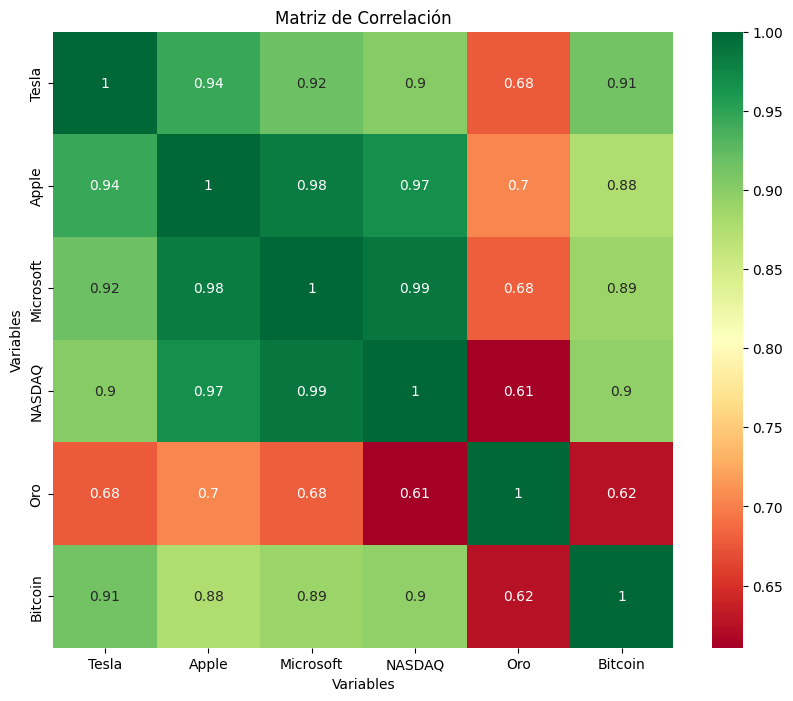

In [325]:
# Creamos el gráfico de mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Personalizamos el gráfico
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

Tras la realización de este gráfico de correlación, podemos observar que existe una fuerte relación entre Tesla, Apple, Microsoft, Nasdaq y Bitcoin, con valores cercanos a 0,9 de correlación con respecto al precio de cierre. Estos resultados indican que los movimientos de precios de estas acciones y activos tienden a estar altamente relacionados entre sí.

Sin embargo, es interesante destacar que el oro muestra una correlación relativamente más baja en comparación con los otros activos mencionados. La correlación del oro con los demás activos se encuentra en un rango de 0,61 a 0,70 con respecto al precio de cierre. Esto sugiere que el oro no sigue necesariamente los mismos patrones de comportamiento que las acciones y Bitcoin, lo cual puede ser atribuido a sus características únicas como activo de refugio seguro y su relación con factores económicos y geopolíticos.

En resumen, los resultados de la correlación nos indican que existe una alta asociación entre Tesla, Apple, Microsoft, Nasdaq y Bitcoin en términos de sus precios de cierre. Por otro lado, el oro muestra una correlación relativamente más baja, lo que sugiere que su comportamiento puede diferir de manera significativa de las acciones y Bitcoin. Estos hallazgos brindan información valiosa para comprender las interrelaciones y diversificación de activos en los mercados financieros.

In [483]:
# Con la función generar_grafico_lineas_conjunto() buscamos poder comparar en un g´rafico de líneas lo que hemos descubierto en el anterior gráfico, es decir, la correlación que se da en los DataFrames con respecto al precio de cierre.
def generar_grafico_lineas_conjunto(dataframes, titulos, colores):

    plt.figure(figsize=(10, 6))
    
    for dataframe, titulo, color in zip(dataframes, titulos, colores):
        plt.plot(dataframe.index, dataframe['Cierre'], label=titulo, color=color)
    
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.title('Correlación en los precios')
    plt.legend()
    plt.show()


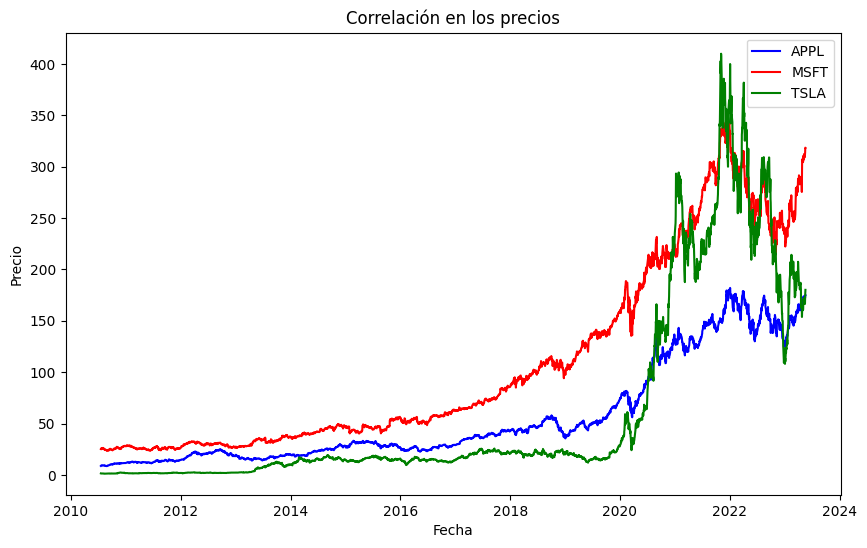

In [484]:
# Usamos la funcion de generar_grafico_lineas_conjunto() para representar los dataframes que queremos mostrar 
dataframes = [apple2, microsoft2, tesla2]
titulos = ['APPL', 'MSFT', 'TSLA']
colores = ['blue', 'red', 'green']

generar_grafico_lineas_conjunto(dataframes, titulos, colores)

Por ejemplo, a través de este gráfico de líneas en el que se comparan a Apple, Microsoft y Tesla partiendo teniendo en el eje X el rango temporal determinado por las fechas y en el eje Y el rengo de los precios. A través de este gráfico podemos determinar la gran correlación que existe entre estas tres acciones, todas ellas ubicadas en el sector tecnológico y operando dentro del NASDAQ. Se observa con cierta facilidad que los precios se comportan de manera similar, es decir, se incrementan todos a la vez y disminuyen todos a la vez, eso si cada uno en un rango de precios distinto, ya que cada acción tiene un valor diferente.

#### Gráfico de barras:

Hemos querido plasmar a través de un gráfico de barras la frecuencia con la que se produce un importante crecimiento en la Var% en cuanto  los días de la semana. Con ello podremos obtener un conocimiento más adecuado de que días de la semana son más frecuentes que se produzca mayor volatilidad en los activos financieros que estamos tratando.
Para ello, como estamos tratando activos financieros distintos nos basaremos en distintos porcentajes de Var%, para únicamente centrarnos en aquellos datos en los que la Var% es una anomalía respecto de ese activo, y nos centraremos en:
1. Para los índices y las materias primas tomaremos en consideración como anomalía un incremento o una disminución del 3% de la Var.
2. Para las acciones tomaremos en consideración como anomalía un incremento o una disminución del 5% de la Var.
3. Para las criptomonedas tomaremos en consideración como anomalía un incremento o una disminución del 10% de la Var.

In [485]:
# Primero realizamos la función de add_dias_semana_column() para añadir la columna pertinente a los Dataframes que no la tienen
def add_dias_semana_column(dataframes):
    for df in dataframes:
        # Extraemos la fecha del índice
        df['Fecha'] = df.index

        # Añadimos la columna 'DiasSemana' en la posición deseada en este caso la columna 2 que pertenece al índice 1
        df.insert(1, 'DiasSemana', df['Fecha'].dt.day_name())



In [486]:
# Estos son los dataframes a los que les falta la columna de DíasSemana
dataframes = [apple2, microsoft2, nasdaq2, oro2, bitcoin2]
add_dias_semana_column(dataframes)


In [490]:
# Filtramos los datos cuando Var.% es superior al 5% o inferior al -5%
tesla2_filtrado = tesla2[(tesla2['Var.%'] > 5) | (tesla2['Var.%'] < -5)]
apple2_filtrado = apple2[(apple2['Var.%'] > 5) | (apple2['Var.%'] < -5)]
microsoft2_filtrado = microsoft2[(microsoft2['Var.%'] > 5) | (microsoft2['Var.%'] < -5)]

# Calculamos la frecuencia de cada día de la semana
frecuencia_tesla = tesla2_filtrado['Var.%'].groupby(tesla2_filtrado['DiasSemana']).count()
frecuencia_apple = apple2_filtrado['Var.%'].groupby(apple2_filtrado['DiasSemana']).count()
frecuencia_microsoft = microsoft2_filtrado['Var.%'].groupby(microsoft2_filtrado['DiasSemana']).count()

# Ordenamos los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
frecuencia_tesla = frecuencia_tesla.reindex(dias_ordenados)
frecuencia_apple = frecuencia_apple.reindex(dias_ordenados)
frecuencia_microsoft = frecuencia_microsoft.reindex(dias_ordenados)

# Creamos los gráficos interactivos de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_tesla,
    name='TSLA',
    marker_color='#FF4081'))

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_apple,
    name='APPL',
    marker_color='#800080'))

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_microsoft,
    name='MSFT',
    marker_color='#00BFFF'))

fig.update_layout(
    title='Frecuencia de días de la semana +=5% ',
    xaxis_title='Día de la semana',
    yaxis_title='Frecuencia %',
    autosize=False,
    width=800,
    height=500,
    barmode='group')

fig.show()


En este gráfico de barras, se representa la frecuencia de ocurrencia de variaciones de +/-5% en un solo día, para cada día de la semana. El eje X muestra los días de la semana, mientras que el eje Y representa la frecuencia con la que se observa esa variación en particular.

Al analizar los resultados, se destaca que Tesla exhibe la mayor volatilidad entre las tres acciones analizadas. Además, se puede observar que el día con la mayor volatilidad para Tesla es el lunes, mientras que para Apple es el miércoles y para Microsoft es el viernes.

Estos hallazgos proporcionan información valiosa para la toma de decisiones de inversión, ya que sugieren que determinados días de la semana pueden presentar mayores probabilidades de experimentar variaciones significativas en el precio de las acciones. Esto puede ser utilizado como una referencia al considerar estrategias de inversión y gestionar riesgos en el mercado financiero.

In [296]:
# Filtramos los datos cuando Var.% es superior al 3% o inferior al -3%
nasdaq2_filtrado = nasdaq2[(nasdaq2['Var.%'] > 3) | (nasdaq2['Var.%'] < -3)]
oro2_filtrado = oro2[(oro2['Var.%'] > 3) | (oro2['Var.%'] < -3)]

# Calculamos la frecuencia de cada día de la semana
frecuencia_nasdaq = nasdaq2_filtrado['Var.%'].groupby(nasdaq2_filtrado['DiasSemana']).count()
frecuencia_oro = oro2_filtrado['Var.%'].groupby(oro2_filtrado['DiasSemana']).count()

# Ordenamos los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
frecuencia_nasdaq = frecuencia_nasdaq.reindex(dias_ordenados)
frecuencia_oro = frecuencia_oro.reindex(dias_ordenados)

# Creamos gráficos interactivos d ebarras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_nasdaq,
    name='NASDAQ',
    marker_color='#FF5733',
    width=0.3))

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_oro,
    name='XAUUSD',
    marker_color='#7FFF00',
    width=0.3))

fig.update_layout(
    title='Frecuencia de días de la semana += 3% Var',
    xaxis_title='Día de la semana',
    yaxis_title='Frecuencia',
    autosize=False,
    width=800,
    height=500,
    barmode='group')

fig.show()



In [288]:
# Filtramos los datos cuando Var.% es superior al 10% o inferior al -10%
bitcoin2_filtrado = bitcoin2[(bitcoin2['Var.%'] > 10) | (bitcoin2['Var.%'] < -10)]

# Calculamos la frecuencia de cada día de la semana
frecuencia_bitcoin = bitcoin2_filtrado['Var.%'].groupby(bitcoin2_filtrado['DiasSemana']).count()

# Ordenamos los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
frecuencia_bitcoin = frecuencia_bitcoin.reindex(dias_ordenados)

# Creamos gráfico interactivo
fig = go.Figure()

fig.add_trace(go.Bar(
    x=dias_ordenados,
    y=frecuencia_bitcoin,
    name='Bitcoin',
    marker_color='#FFC300',
    width=0.3))  

fig.update_layout(
    title='Frecuencia de días de la semana +=10 % Var (BTCUSD)',
    xaxis_title='Día de la semana',
    yaxis_title='Frecuencia %',
    autosize=False,
    width=800,
    height=500)

fig.show()


### Conclusión del EDA:  "Más allá de los números: Explorando la volatilidad y las conexiones entre Bitcoin, Nasdaq, acciones y Oro"

#### Hipótesis 1: La volatilidad de Bitcoin es significativamente superior  a la del resto.

Después de llevar a cabo un análisis exploratorio de datos y examinar las diversas gráficas, hemos evaluado la hipótesis de que la volatilidad de Bitcoin es notablemente superior a la de otros activos.

Nuestros hallazgos respaldan esta hipótesis, ya que hemos observado que Bitcoin exhibe una volatilidad considerablemente más alta en comparación con otros activos. En varias comparaciones, hemos encontrado que la volatilidad de Bitcoin es significativamente mayor que la mayoría de los demás activos.

Sin embargo, es importante destacar que durante nuestro análisis también hemos descubierto que Tesla muestra una volatilidad notable y comparable a la de Bitcoin. Aunque la volatilidad de Tesla es ligeramente inferior, no se observa una diferencia significativa en comparación con el resto de los activos analizados.

En resumen, podemos concluir que Bitcoin es el activo con la mayor volatilidad en general, pero también debemos reconocer que Tesla muestra una volatilidad considerable y comparable. Estos hallazgos destacan la importancia de considerar tanto Bitcoin como Tesla como activos volátiles en el contexto de inversiones y estrategias financieras.

#### Hipótesis 2: Existe una correlación significativa entre los activos financieros analizados.

Para demostrar esta hipótesis, se realizaron análisis de correlación entre los precios de cierre de los diferentes activos financieros. Los resultados revelaron una correlación significativamente alta (valores cercanos a 0,9) entre las acciones mencionadas y Bitcoin, lo que sugiere que los movimientos de precios de estos activos tienden a estar estrechamente relacionados.

Por otro lado, se encontró que el oro mostró una correlación relativamente más baja (rango de 0,61 a 0,70) con respecto a los demás activos. Esto indica que el comportamiento del oro difiere en cierta medida de las acciones y Bitcoin, posiblemente debido a sus características como activo de refugio seguro y su relación con factores económicos y geopolíticos.

En conclusión, la evidencia respalda la hipótesis de una alta correlación entre las acciones de Tesla, Apple, Microsoft, Nasdaq y Bitcoin en comparación con el oro. Esto implica que estos activos financieros pueden moverse de manera similar en el mercado, mientras que el oro puede tener un comportamiento diferente. Estos hallazgos proporcionan información valiosa para los inversionistas y analistas en la diversificación de sus carteras y la comprensión de las interrelaciones entre diferentes clases de activos..

#### Hipótesis 3: "El impacto de los días de la semana en la volatilidad de los activos financieros: Un análisis comparativo entre índices, acciones y criptomonedas"

La volatilidad en los activos financieros está influenciada por los días de la semana, y existen patrones significativos que indican que ciertos días presentan mayor frecuencia de variaciones anómalas en la Var% en comparación con otros días.

Específicamente, se observa que para los índices y las materias primas, un incremento o disminución del 3% en la Var% se considera una anomalía. En este caso, se ha encontrado que el día más volátil para el NASDAQ es el miércoles, mientras que para el oro es el viernes.

Por otro lado, en el caso de las acciones, se considera una anomalía un incremento o disminución del 5% en la Var%. En este sentido, se ha demostrado que el NASDAQ ha superado notablemente al oro en términos de volatilidad, y se ha identificado el miércoles como el día más volátil para el NASDAQ.

En cuanto a la criptomonedas, donde se considera una anomalía un incremento o disminución del 10% en la Var%, se ha observado que Bitcoin no presenta una diferencia significativa en volatilidad con respecto a los demás activos. Sin embargo, se destaca que el jueves es el día más volátil para Bitcoin, mientras que el viernes se encuentra relativamente alejado de los otros días en términos de volatilidad.

Estos resultados respaldan la hipótesis de que los días de la semana pueden influir en la volatilidad de los activos financieros y proporcionan información relevante para la toma de decisiones de inversión.